In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Input as id input

def g_h_filter(z,x_est,dx,g,h,dt,first_time = 0):
    if first_time ==1:
        x0 = z
    #prediction step
    x_pred = x_est + (dx*dt)
    dx = dx
        
    # update step
    residual = z - x_pred
    dx = dx + h * (residual) / dt
    x_est = x_pred + g * residual    
    return x_est,dx
        

In [3]:
# Input as array of 1d inputs

"""
Performs g-h filter on 1 state variable with a fixed g and h.
'data' contains the data to be filtered.
'x0' is the initial value for our state variable
'dx' is the initial change rate for our state variable
'g' is the g-h's g scale factor
'h' is the g-h's h scale factor
'dt' is the length of the time step
"""
def g_h_filter_array(data, x0, dx, g, h, dt=1.):
    x_est = x0
    results = []
    k = 1
    for z in data:
        x_est,dx = g_h_filter(z,x_est,dx,g,h,dt,first_time = k)
        k = 0
        results.append(x_est)
    return np.array(results)

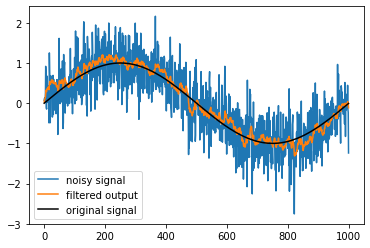

In [4]:
noise = np.random.normal(0,0.5,1000)
t = np.arange(1000)/1000
f = 1
sig = np.sin(2*np.pi*f*t)
noisy = sig + noise
a = g_h_filter_array(noisy,0,0.03,0.1,0.001,1)
plt.plot(noisy,label='noisy signal')
plt.plot(a,label='filtered output')
plt.plot(sig,color = 'black',label = 'original signal')
plt.legend(loc = 'lower left')
plt.show()